In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

import numpy as np
import pandas as pd
import g3py as g3

g3.style_big_seaborn()
g3.style_widget()


Regression Models
* [Gaussian Processes](#Gaussian-Processes)
* [Gaussian Random Fields](#Gaussian-Random-Fields)

# Gaussian Processes

Loaded model models/01-gp.g3


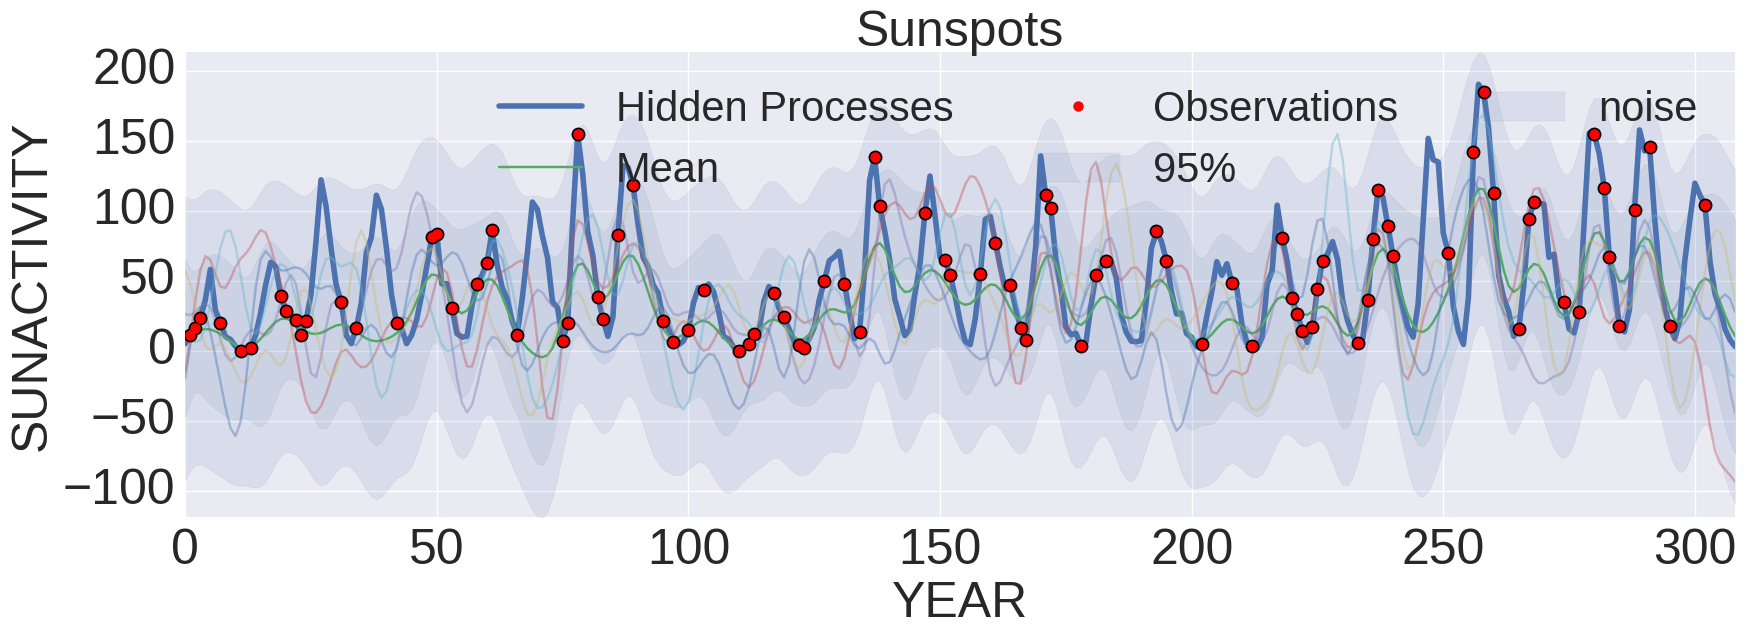

In [2]:
x, y = g3.load_sunspots()
obs_j, x_obs, y_obs, test_j, x_test, y_test = g3.random_obs(x, y, 0.3)
gp = g3.GaussianProcess(x, g3.Zero(), g3.SE(x), hidden=y, file='models/01-gp.g3')
gp.describe('Sunspots','YEAR','SUNACTIVITY')
gp.observed(x_obs,y_obs)
gp.plot(samples=5)

In [3]:
gp.widget_params()

Starting function value (-logp): 496.432


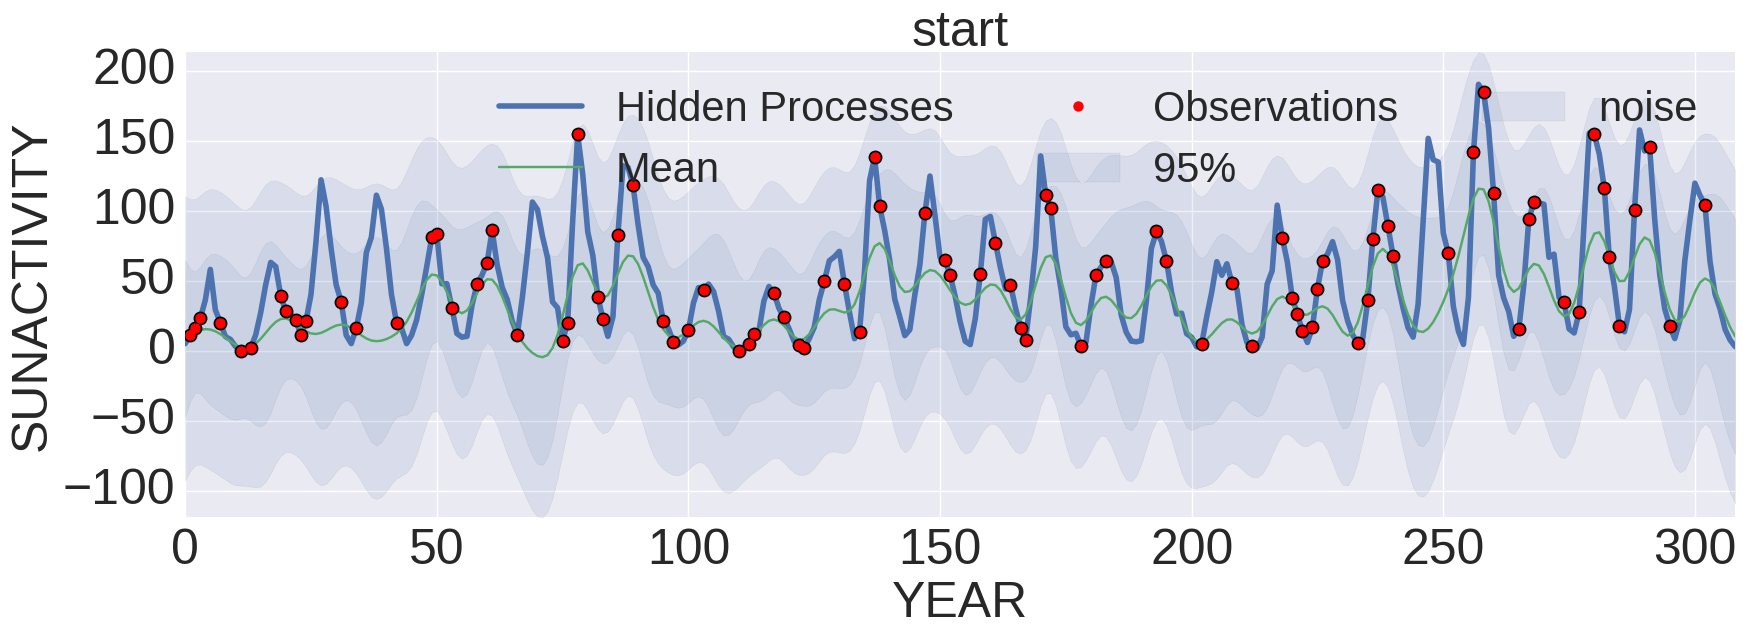


start_bfgs
         Current function value: 472.376038
         Iterations: 16
         Function evaluations: 103
         Gradient evaluations: 91


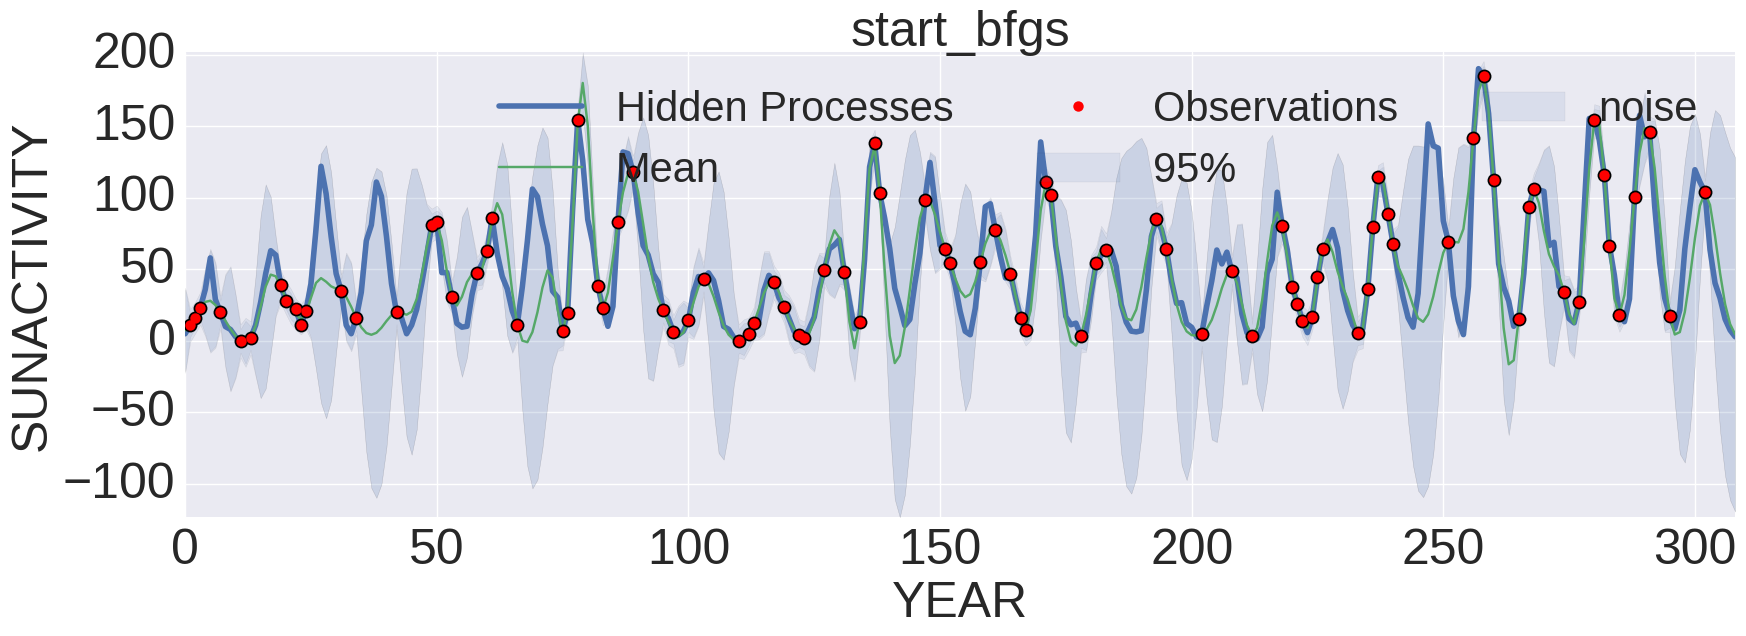


start_powell
Optimization terminated successfully.
         Current function value: 472.381714
         Iterations: 3
         Function evaluations: 126


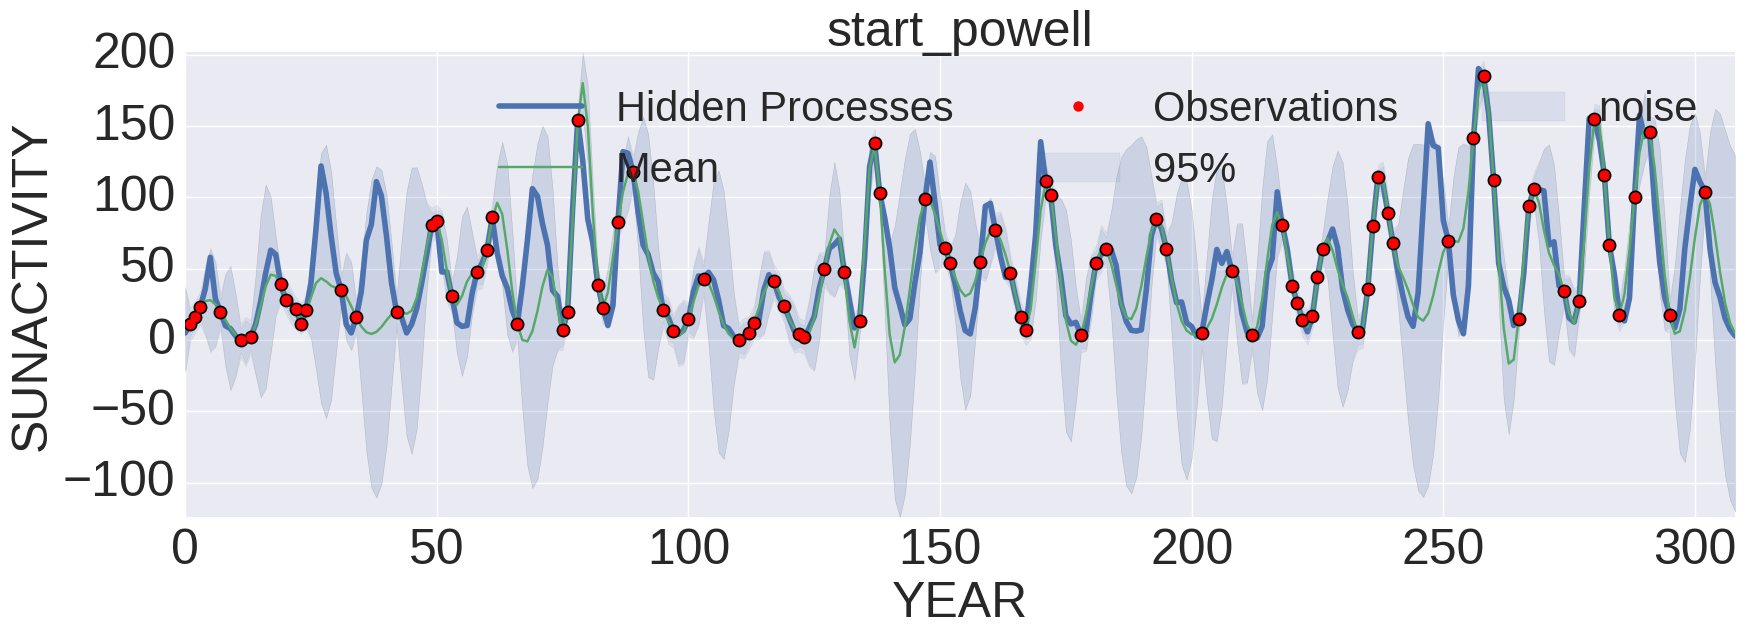


start_bfgs_powell
Optimization terminated successfully.
         Current function value: 472.376038
         Iterations: 1
         Function evaluations: 112


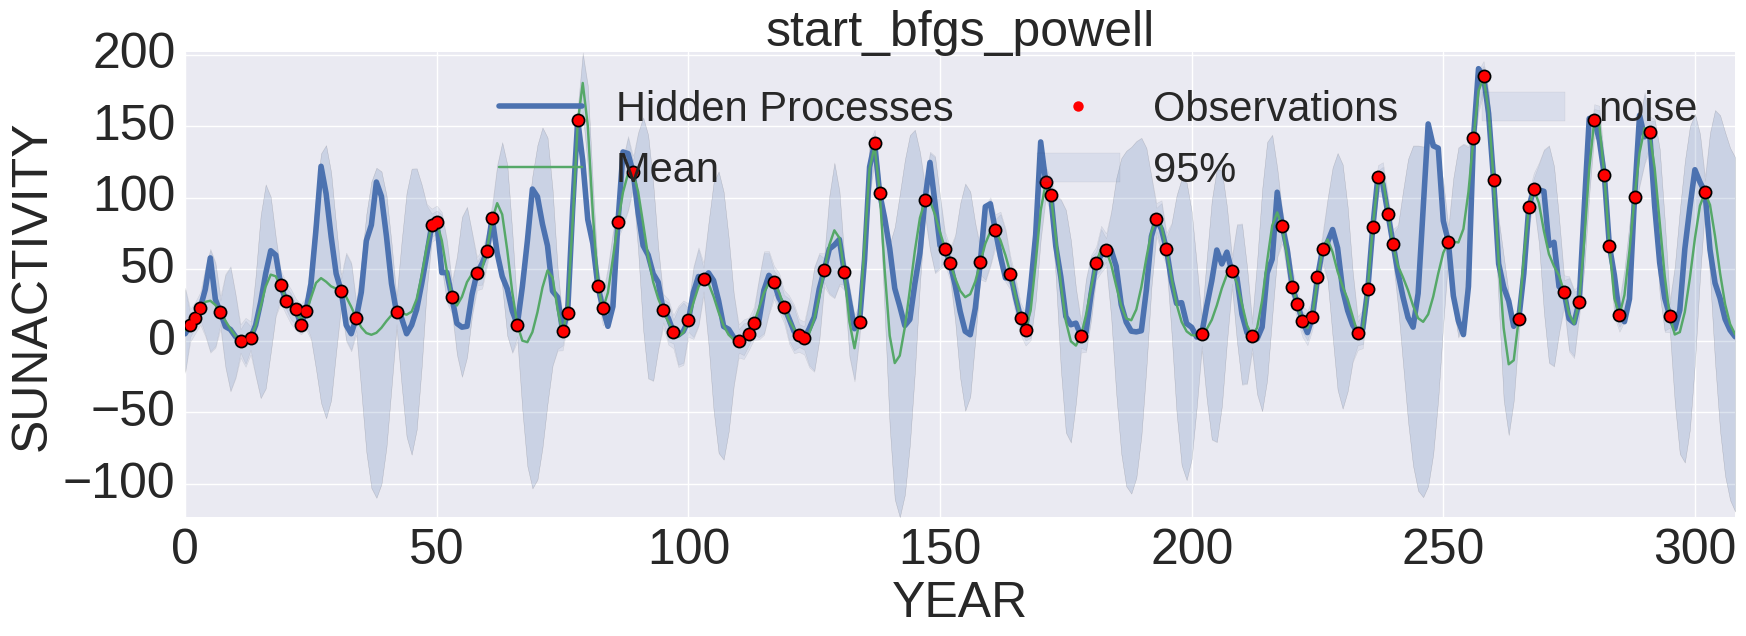

In [5]:
params = gp.find_MAP(start=gp.get_params_widget(), points=2, plot=True)

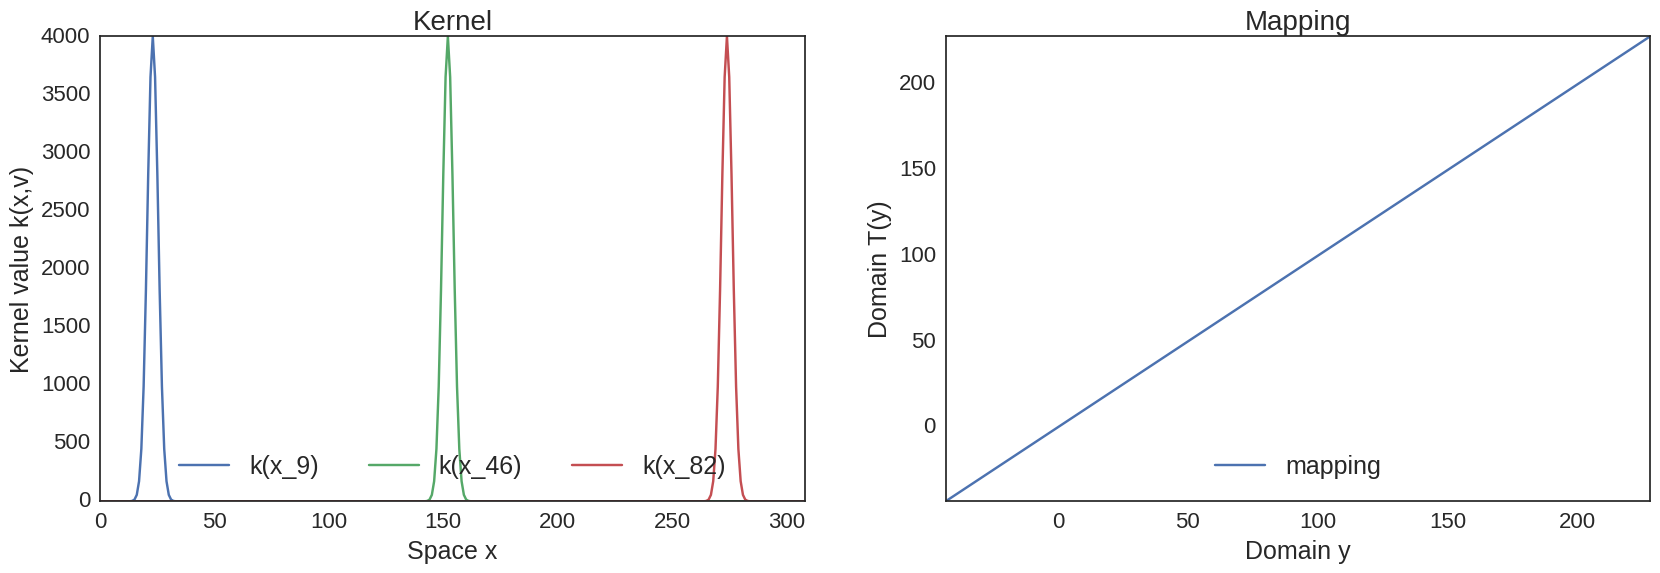

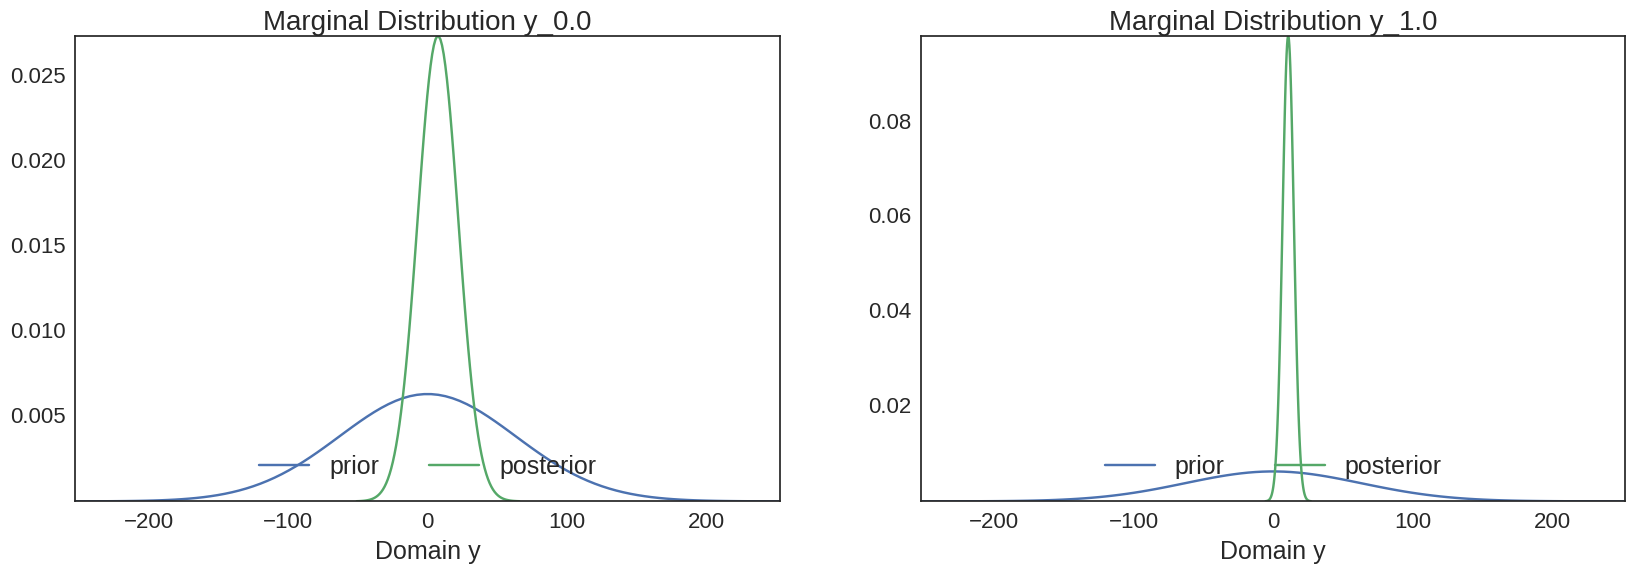

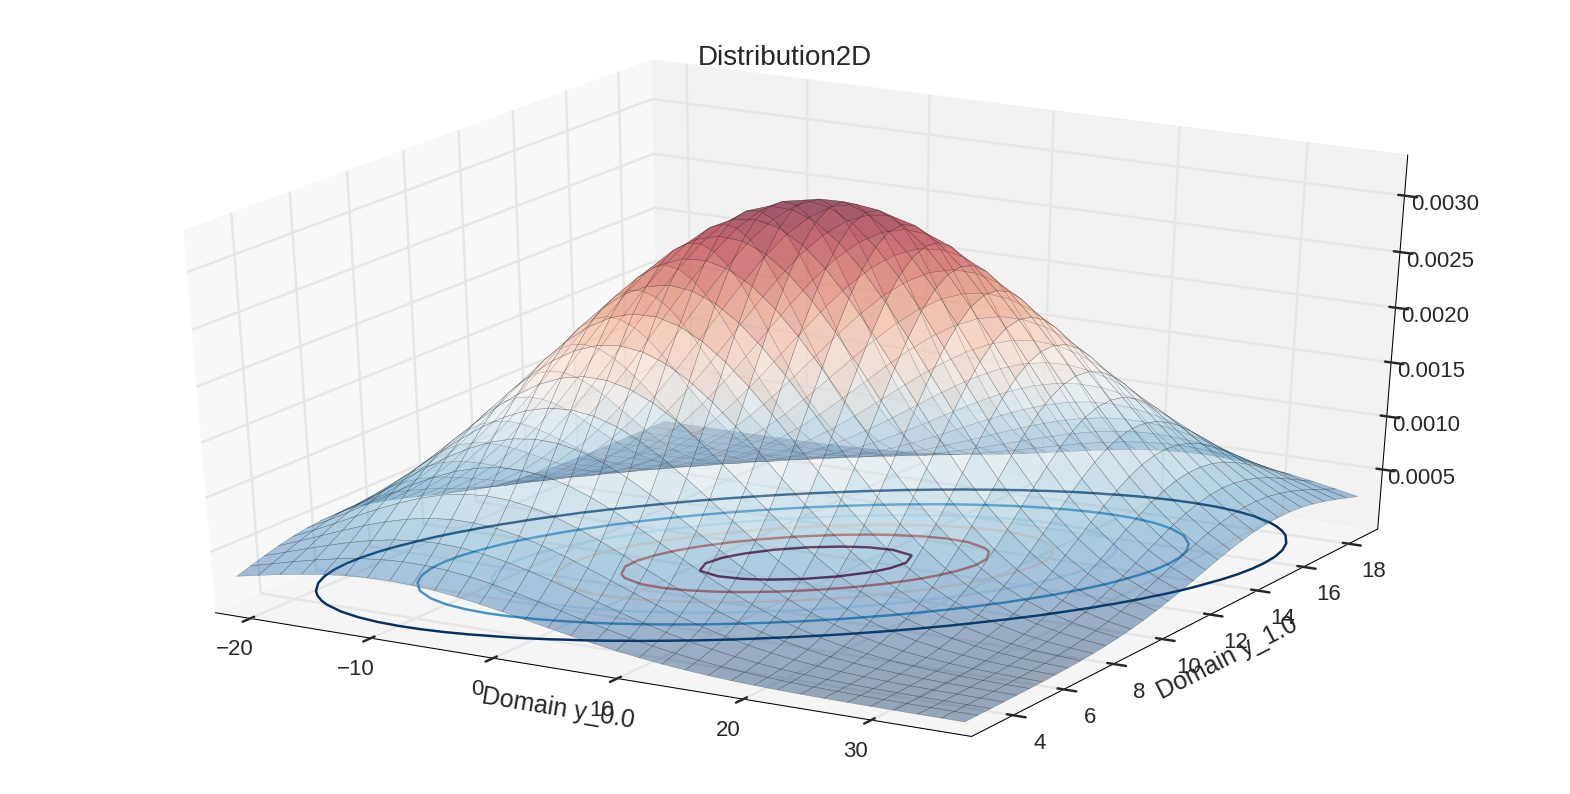

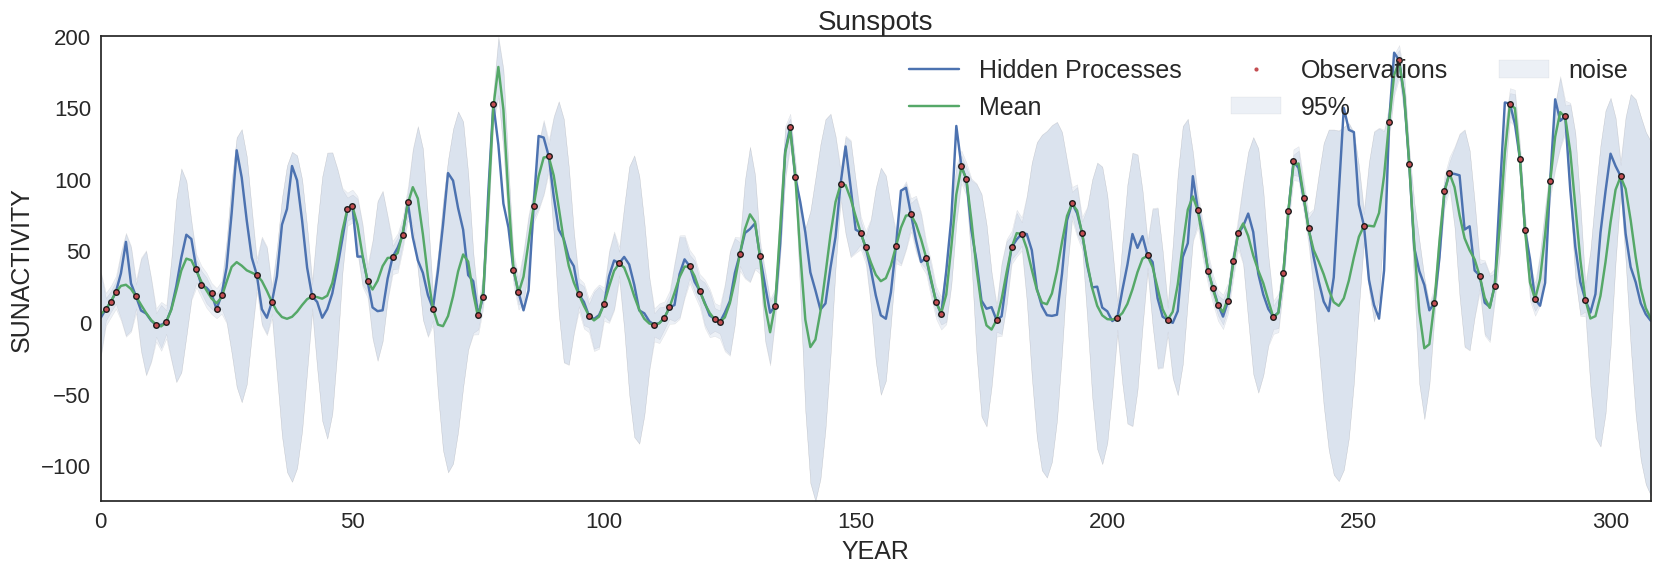

In [6]:
g3.style_normal()
gp.plot_model(params)
gp.plot(params)
g3.plot_save('images/01-Gaussian-Processes.pdf')

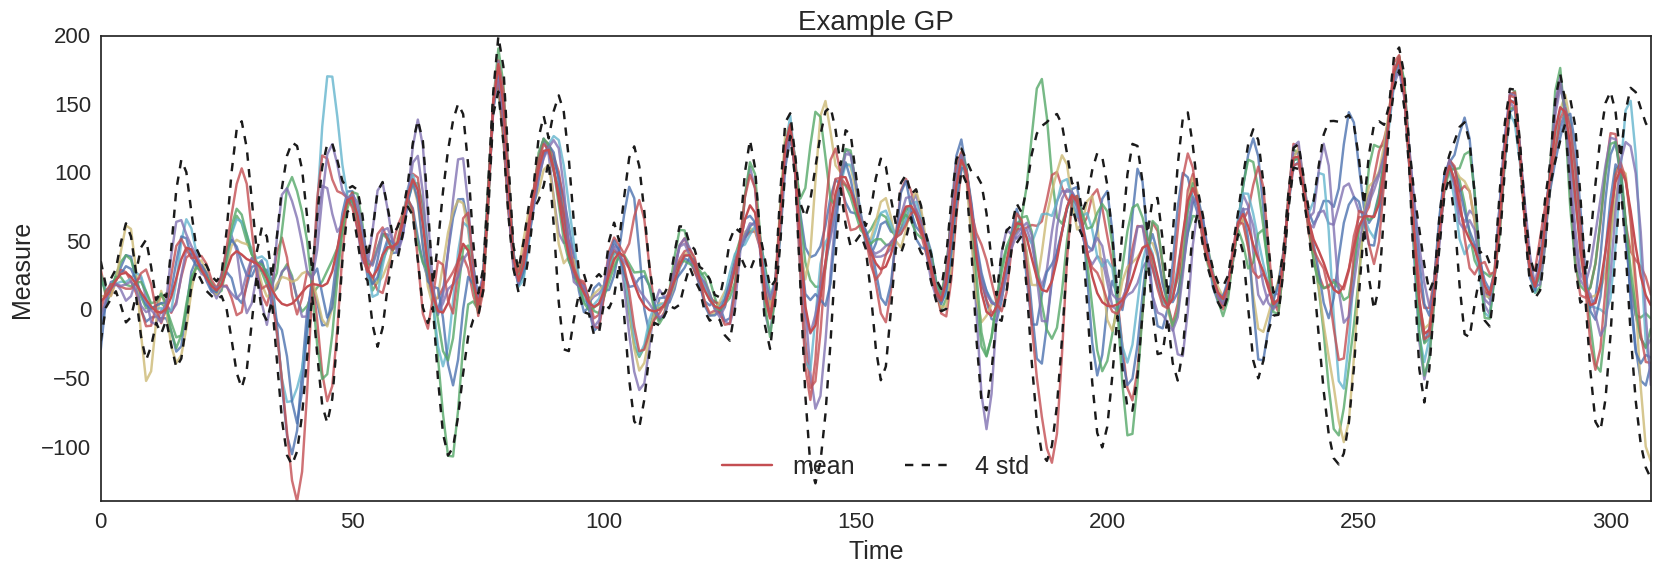

In [7]:
g3.style_normal()
prediction = gp.predict(params, samples=10)
mu, std, samples = prediction.mean, prediction.std, prediction.samples
g3.plot(samples, alpha=0.8)
g3.plot(mu, 'r', label='mean')
g3.plot(mu + 2*std, '--k', label='4 std')
g3.plot(mu - 2*std, '--k')
g3.plot_text('Example GP', 'Time', 'Measure')
g3.plot_save('images/01-Gaussian-Processes-2.pdf')

Download Images
* [01-Gaussian-Processes.pdf](images/01-Gaussian-Processes.pdf)
* [01-Gaussian-Processes-2.pdf](images/01-Gaussian-Processes-2.pdf)

# Gaussian Random Fields

In [2]:
g3.style_seaborn()

name_data = 'abalone'
names=['Sex','Length', 'Diam', 'Height', 'Whole', 'Shucked', 'Viscera','Shell','Rings']
abalone = pd.read_csv('data/abalone.csv', names=names)
#abalone['Sex'] = (abalone['Sex'] == 'M')*-1.0 + (abalone['Sex'] == 'F')*1.0 + 0.0
abalone = abalone.drop('Sex', axis=1) # Drop categoric variable
x = abalone.drop('Rings', axis=1).values.astype(dtype=np.float32)
y = abalone['Rings'].values.astype(dtype=np.float32)
p_obs = 0.3*0.2395
obs_j, x_obs, y_obs, test_j, x_test, y_test = g3.random_obs(x, y, p_obs)

Total: 4177 | Obs: 300 (7.182188173330141%)


Loaded model models/01-abalone_GP.g3


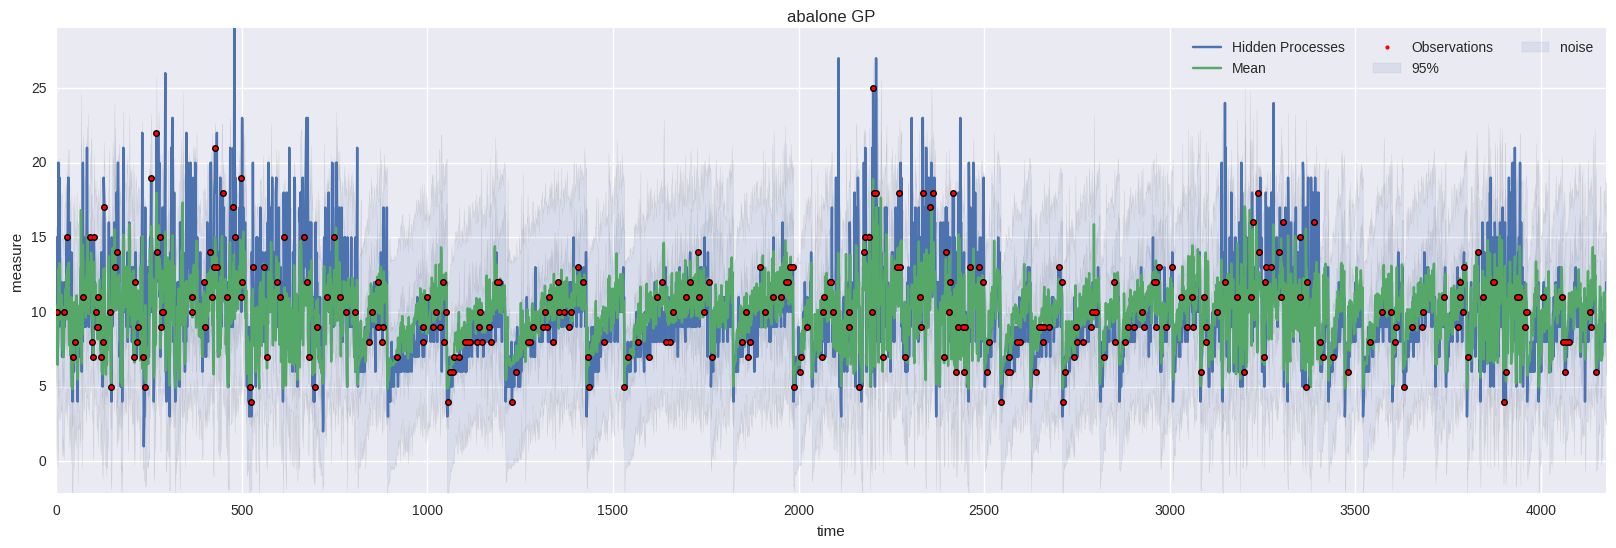

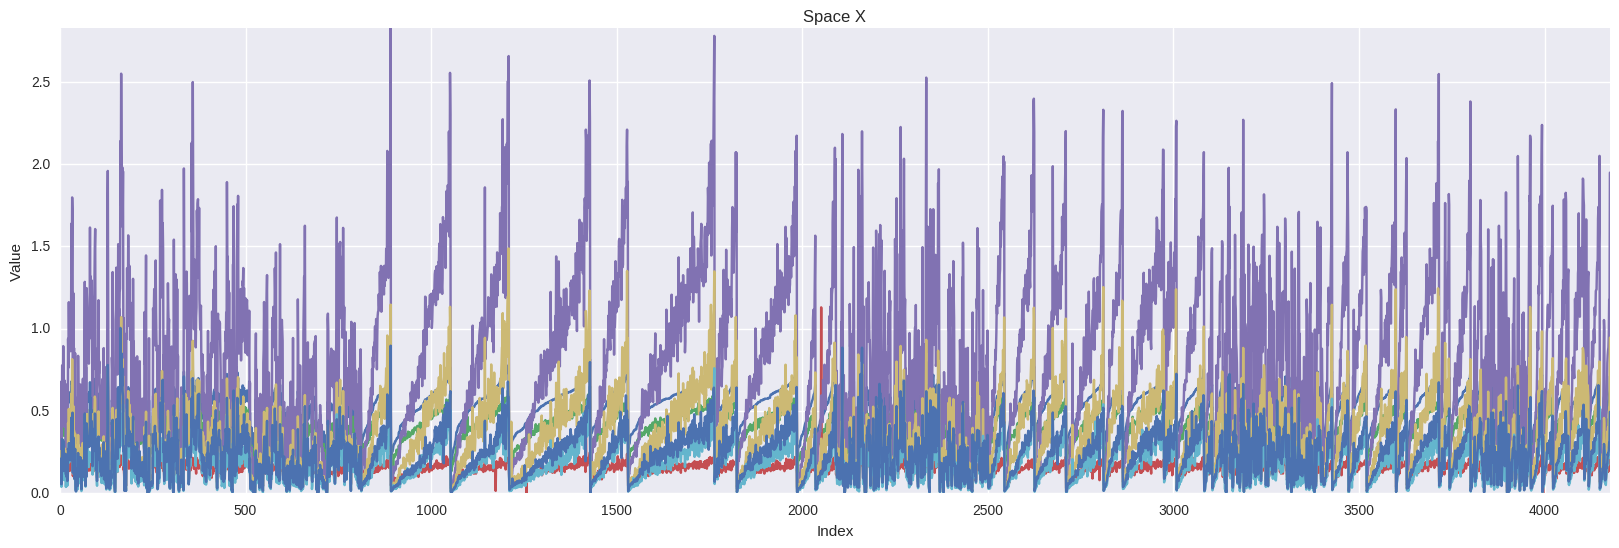

In [9]:
gp = g3.GaussianProcess(x.shape[1], g3.Bias(), g3.SE(x_obs), hidden=y, file='models/01-'+name_data+'_GP.g3')
gp.describe(name_data+' GP','time','measure','GP')
gp.observed(x_obs, y_obs, obs_j)
gp.set_space(x, y)
gp.plot(plot_space=True)

In [19]:
params = gp.find_MAP(points=4)
gp.set_params(params)

Starting function value (-logp): 718.053

start_bfgs
         Current function value: 631.724182
         Iterations: 25
         Function evaluations: 114
         Gradient evaluations: 103

start_powell
Optimization terminated successfully.
         Current function value: 631.728088
         Iterations: 4
         Function evaluations: 551

start_bfgs_powell
Optimization terminated successfully.
         Current function value: 631.723938
         Iterations: 1
         Function evaluations: 299

start_powell_bfgs
         Current function value: 631.724243
         Iterations: 8
         Function evaluations: 71
         Gradient evaluations: 60

start_bfgs_powell_bfgs
         Current function value: 631.723938
         Iterations: 0
         Function evaluations: 65
         Gradient evaluations: 53


Test:    {'_BiasL1': 1.6633692, '_BiasL2': 5.7569342, '_NLPD': 3.7450505558714386, '_NLL': 11872.90304045966}
Default: {'_BiasL1': 1.5738318, '_BiasL2': 5.2778554, '_NLPD': 2.3527029529267418, '_NLL': 4034.6827866890112}
Current: {'_BiasL1': 1.6137509, '_BiasL2': 5.2651138, '_NLPD': 2.250219299886282, '_NLL': 180.75181050993535}


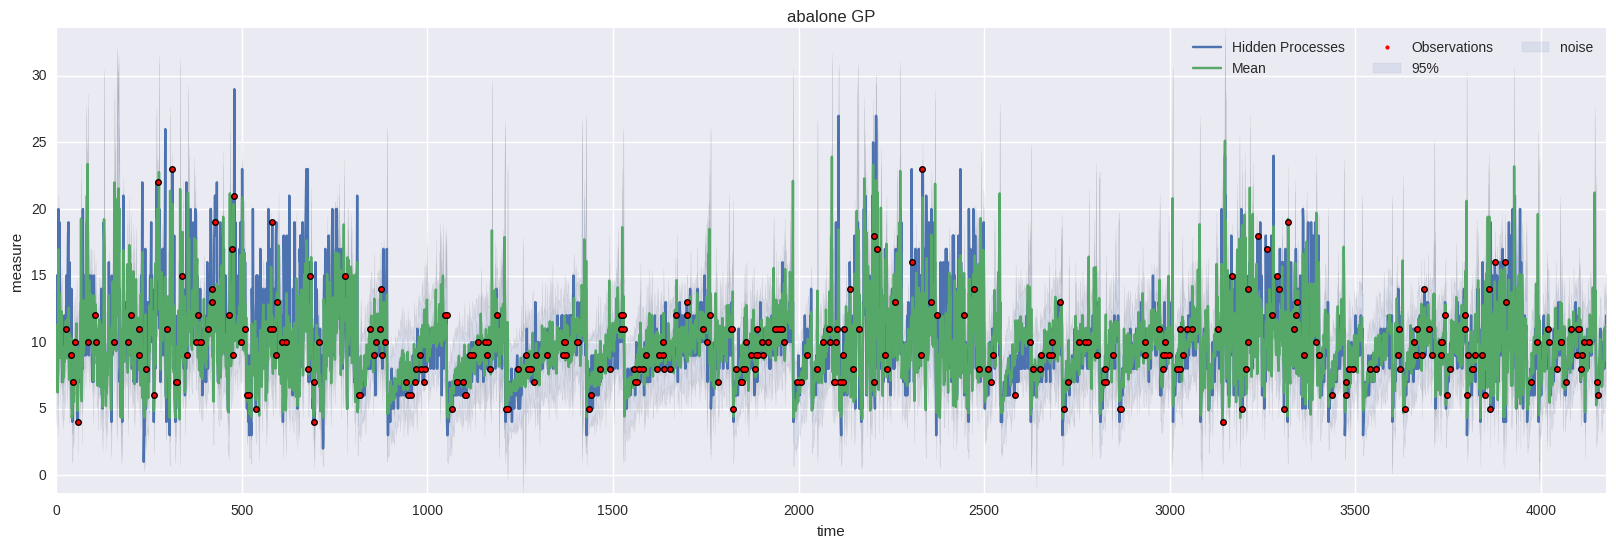

In [30]:
print('Test:   ', gp.scores(gp.get_params_test()))
print('Default:', gp.scores(gp.get_params_default()))
print('Current:', gp.scores(gp.get_params_current()))
gp.plot()